# 1. Business Understanding

Выберите ряд из первого задания и постройте его модель ARIMA. Отчет нужно будет оформить в jupyter-ноутбук.<br>
Дополнительное задание: попробуйте спрогнозировать график классическим ML.

# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from math import sqrt

C:\Users\IceWindDale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\IceWindDale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# pip install 'statsmodels==0.11.1' --force-reinstall
# инсталируем старую statsmodels, чтоб не переделывать заново legacy code
import statsmodels
statsmodels.__version__

'0.11.1'

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# 3. Data Preparation

# 4. Modeling

### ARIMA (p,d,q)
ARIMA - естественное расширение модели ARMA. Как мы уже хорошо знаем - многие временные ряды не стационарны, но они могут такими стать в результате операции дифференцирования. В модели ARIMA "дифференцирование" (в количестве d-раз) вносится в саму модель


$\delta^p y_t = c + \sum_{i=1}^p a_i \delta^d y_{t-i} + \sum_{j=1}^q b_j \epsilon_{t-j} + \epsilon_t$

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [5]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')
    return

In [6]:
def arima_results(data, n=3):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    for i in range(n):
        for d in range(n):
            for j in range(n):
                try:
                    tmp_mdl = smt.ARIMA(data, order=(i,d,j)).fit(method='mle', trend='nc')
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
#     return ('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
    return (best_mdl, best_order, best_aic)

Monthly sales of company X aic: 23.11702 | order: (0, 1, 2)
Monthly Boston armed robberies aic: -43.37618 | order: (0, 1, 2)
International airline passengers: monthly totals in thousands aic: -240.84655 | order: (0, 1, 2)
Mean monthly air temperature (Deg. F) Nottingham Castle aic: -434.30041 | order: (0, 1, 2)
Weekly closings of the Dow-Jones industrial average aic: -766.36722 | order: (1, 1, 0)
Daily total female births in California aic: -261.03137 | order: (0, 1, 2)


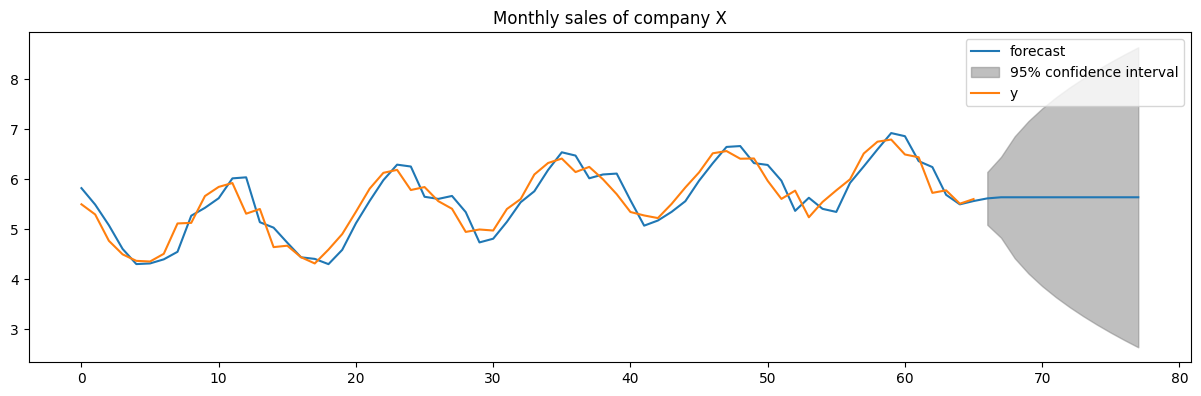

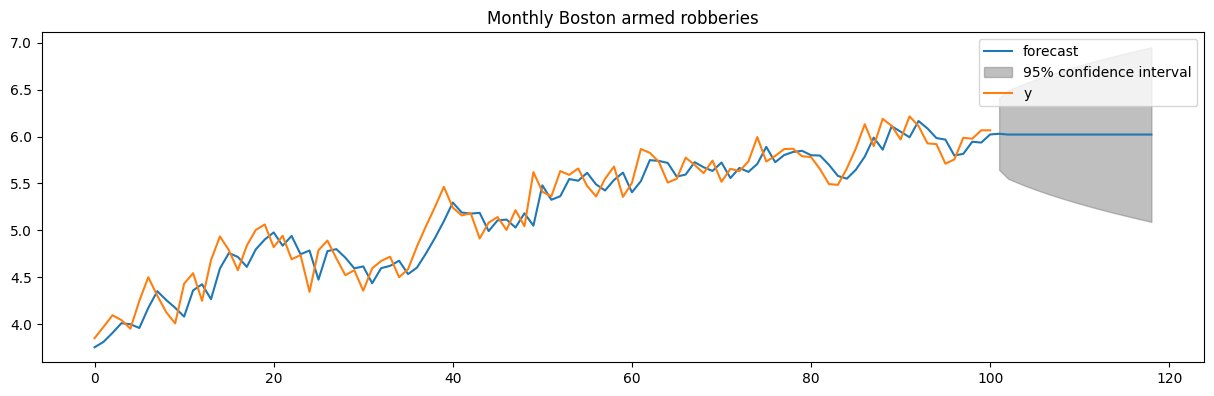

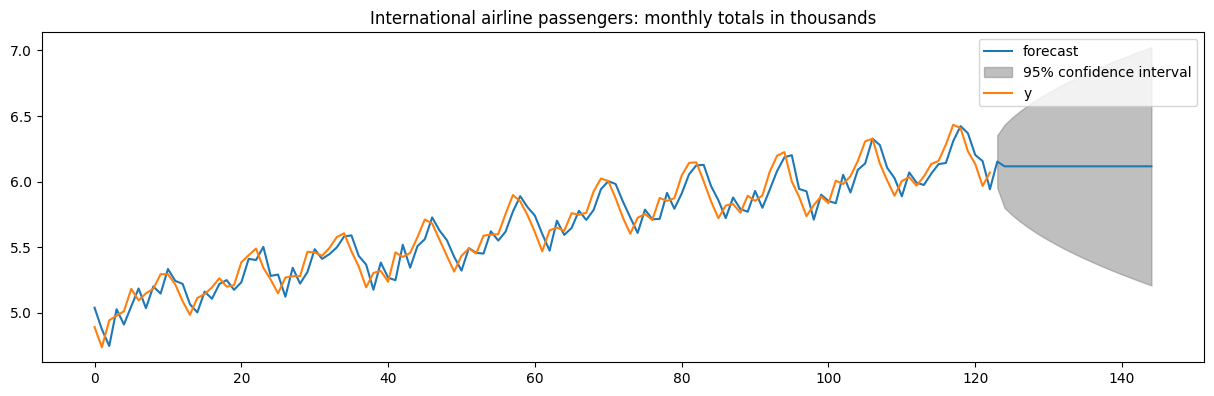

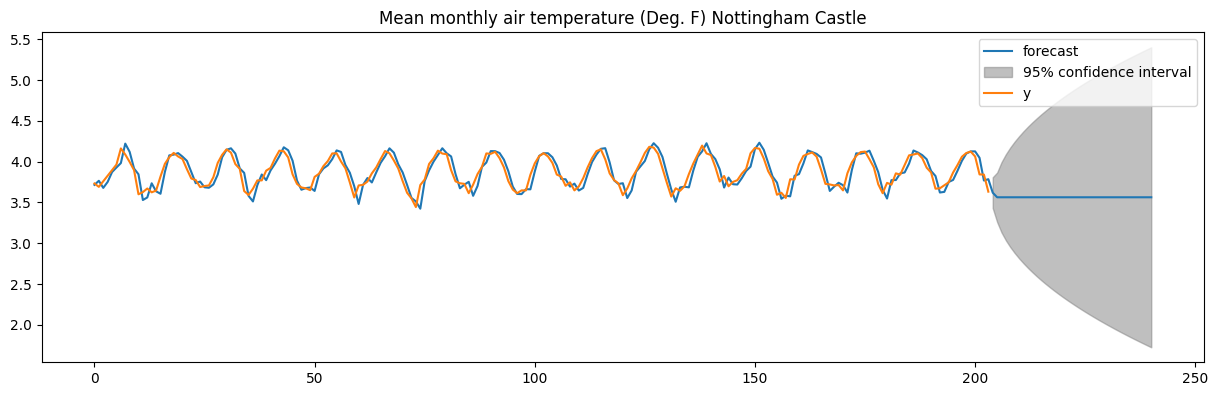

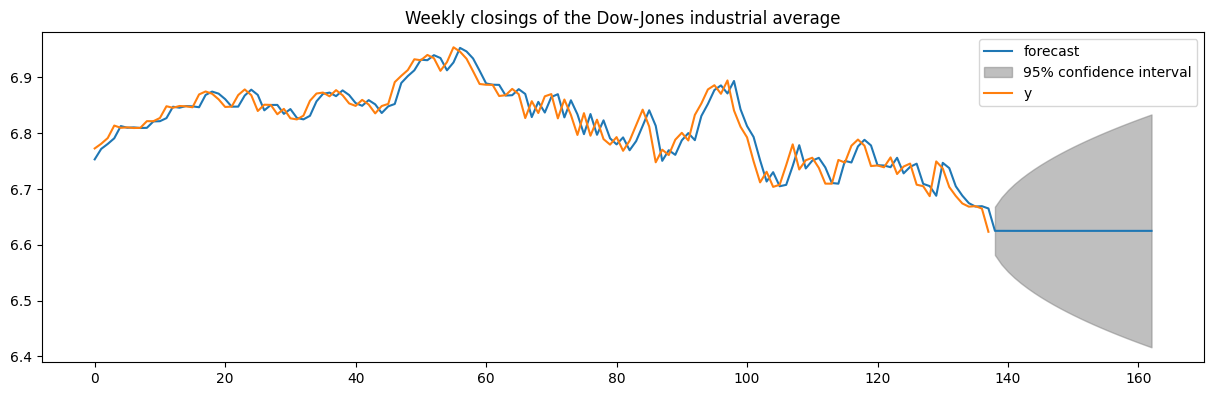

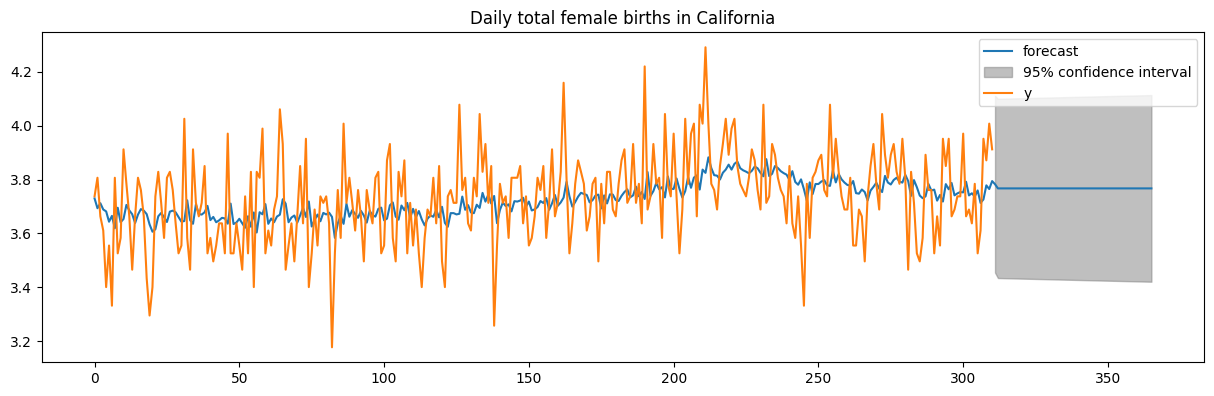

In [21]:
for i, key in enumerate(all_series.keys()):
    new_series = boxcox(all_series[key], 0)
    result = arima_results(new_series, 3)
    
#     result = arima_results(all_series[key], 3)
    
    best_mdl = result[0]
    order = result[1]
    aci = result[2]
       
    print(key, 'aic: {:6.5f} | order: {}'.format(aci, order))
    ds_lenght = int(len(all_series[key])*0.15)
    height = len(all_series.keys())

    plt.figure(figsize=(15,height*5))
    ax = plt.subplot(height, 1, i+1)
    ax.set_title(list(all_series.keys())[i])
    best_mdl.plot_predict(ds_lenght, len(all_series[key])+ds_lenght, ax=ax)    

In [8]:
#Забиваем костыли в mean_monthly_temp и dowjones_closing, потому что 
# нет времени думать как заменить в цикле Count на универсальный итератор :(
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
mean_monthly_temp.rename(columns = {'Deg':'Count'}, inplace = True)
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
dowjones_closing.rename(columns = {'Close':'Count'}, inplace = True)
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [9]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Count"],
    "Daily total female births in California": female_births["Count"]
}

In [13]:
def PrepData(data, lag_start=5, lag_end=15, test_size=0.3): 
    data = pd.DataFrame(data.copy())
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.Count.shift(i)
    data = data.dropna()
    data = data.reset_index(drop=True)
#     data = data.drop(["Month"], axis=1)
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["Count"], axis=1)
    y_train = data.loc[:test_index]["Count"]
    X_test = data.loc[test_index:].drop(["Count"], axis=1)
    y_test = data.loc[test_index:]["Count"]
    return X_train, X_test, y_train, y_test

In [14]:
def LinReg(prepdata, key):
    X_train, X_test, y_train, y_test = prepdata
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    prediction = lr.predict(X_test)
    trainPred = lr.predict(X_train)

    plt.figure(figsize=(15, 5))
    plt.plot(prediction, "r", label="prediction")
    plt.plot(y_test.values, label="actual")
    plt.legend(loc="best")
    plt.title(key)
    plt.grid(True)
    return

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

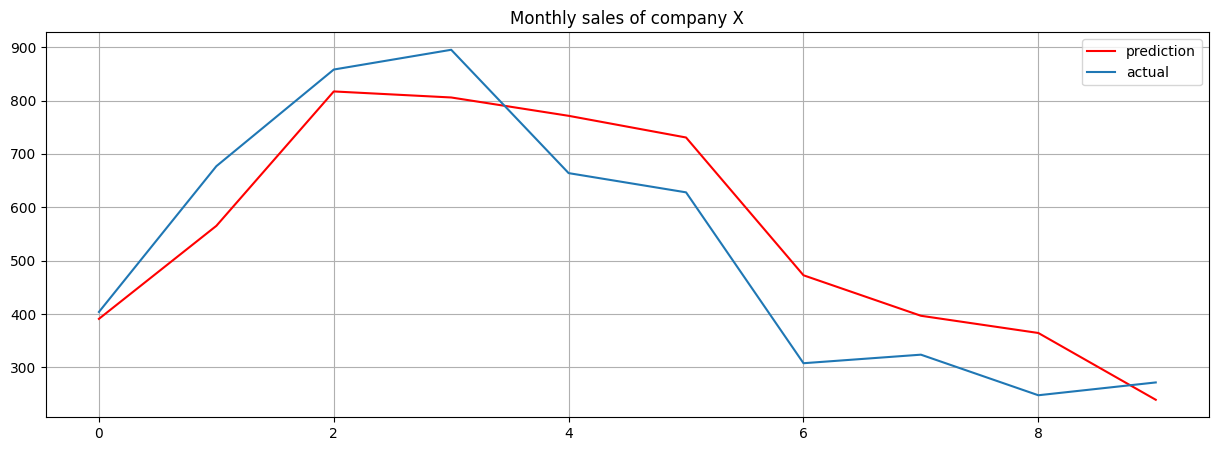

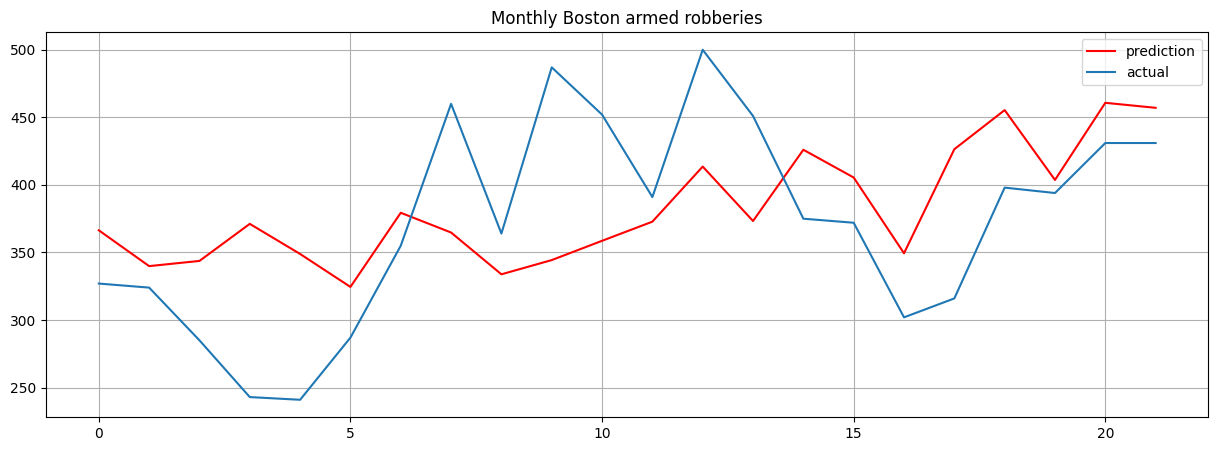

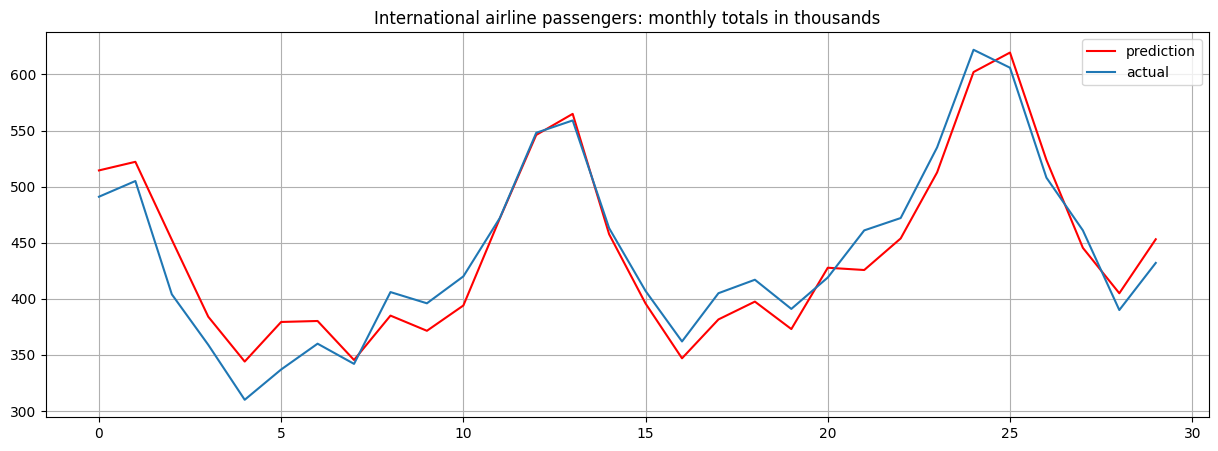

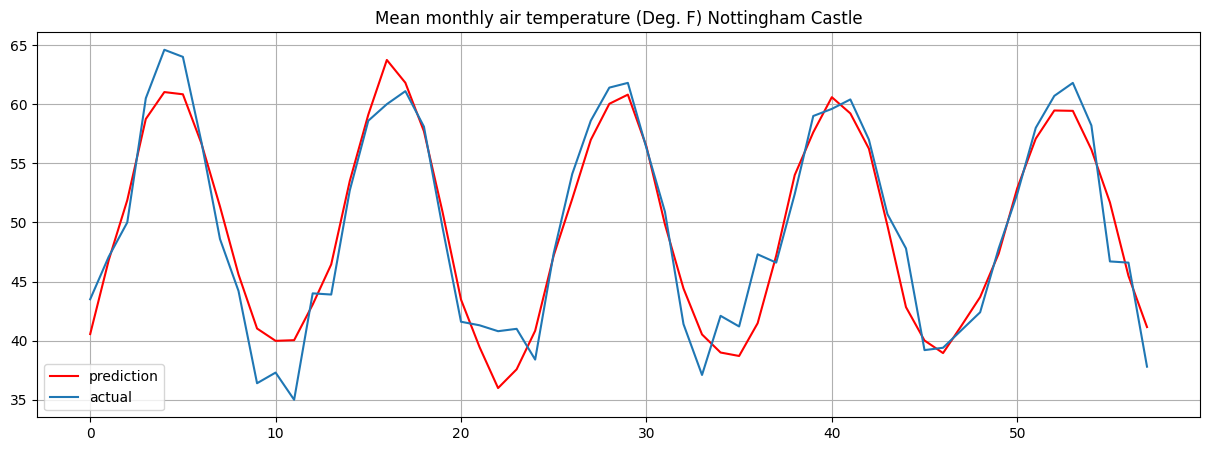

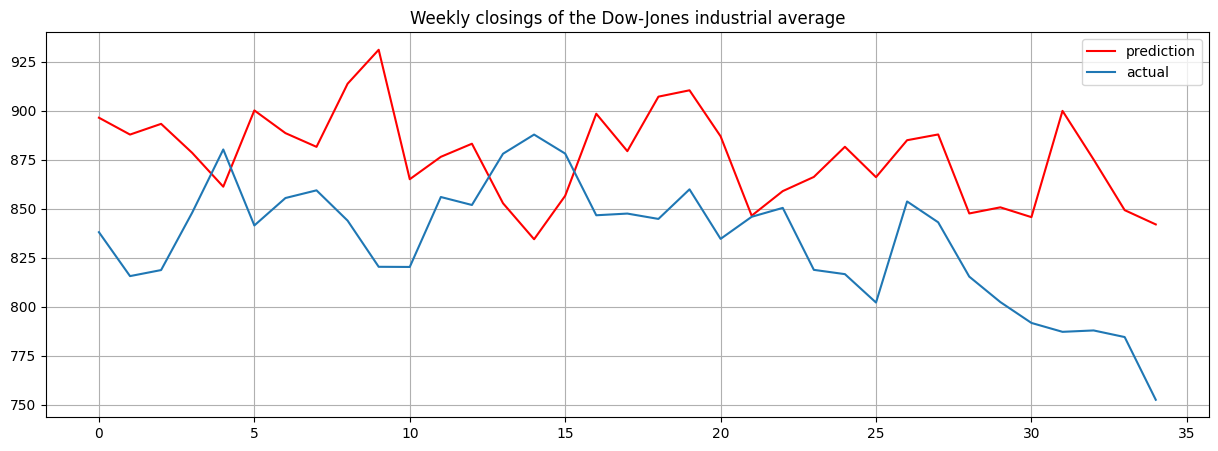

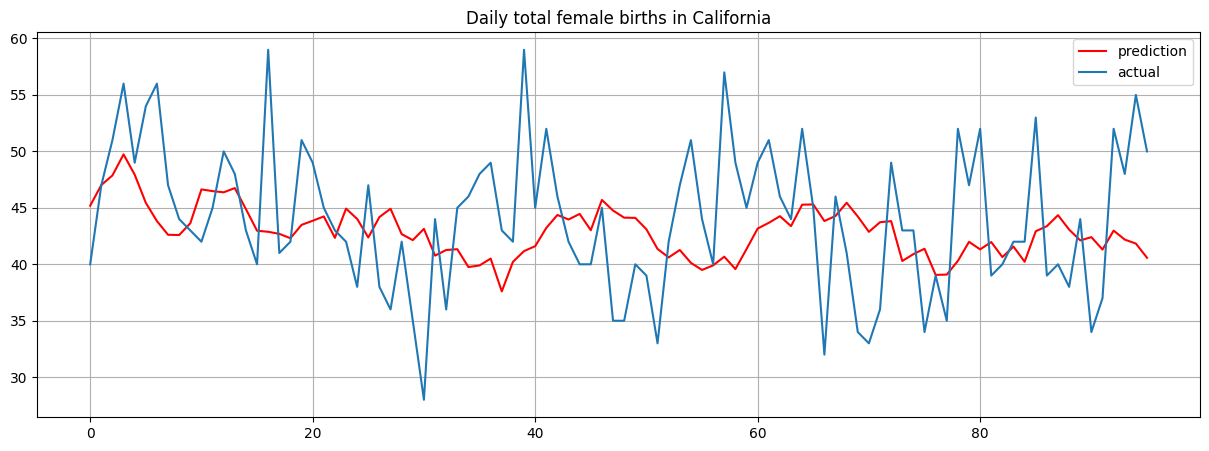

In [15]:
for key in all_series.keys():
    data = (all_series[key])
    LinReg(PrepData(data), key)

# 5. Evaluation

Странно, но ARIMA неплохо подсказывает только тренд без цикличности, когда все датасеты прогоняются через loop. Когда запускал 1 датасет для ARIMA, то получалось подхватить несколько угасающих циклов. Возможно не до конца разобрался в настройках ARIMA.fit

Линейная регрессия удивила неплохой предсказательностью на тестовых данных при наличие "сезонности", видимо лаг для формирования фичей примерно совпал с сезонностью.

# 6. Deployment